In [45]:
import sys
import os
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [74]:
results_path = path_join(abspath("."), "..", "experiments/results")

datasets = ["mnist"]

results = dict()


r = dict()
for d in datasets:
    p = dict()
    validation_accuracy = []
    validation_loss = []
    runtime = []
    config_ids = []
    configs=[]
    params = []
    pad = []
    rescale = []
    horizontal_flip = []
    vertical_flip = []
    rotation = []
    
    path = path_join(abspath("."), "..", "experiments/results")
    n_runs = len([name for name in os.listdir(path_join(path, "mnist"))])
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            config_path = "%s/config_%d.json" % (d, i)
            filename = path_join(path, config_path)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
      
        #print(res["configs"])
        runtime.append(res['runtime'])
        configs.append(res['configs'])

        config_ids.append(res["config_id"])
        validation_accuracy.append(res["validation_accuracy"])
        pad.append(res["configs"]["pad"])
        rescale.append(res['configs']['rescale'])
        horizontal_flip.append(res['configs']['horizontal_flip'])
        vertical_flip.append(res['configs']['vertical_flip'])
        rotation.append(res['configs']['rotation_range'])


    p['validation_accuracy'] = np.array(validation_accuracy)
    p["runtime"] = np.array(runtime)
    #p["params"] = params
    p['configs'] = configs
    p['config_ids'] = config_ids
    p['pad'] = pad
    p['rescale'] = rescale
    p["horizontal_flip"] = horizontal_flip
    p['vertical_flip'] = vertical_flip
    p['rotation'] = rotation
    results[d] = p
    pr

    



TypeError: eval() arg 1 must be a string, bytes or code object

PDF plots of validation accuracy results on augmented MNIST image data

In [75]:
dataset = "mnist"
validation_accuracy = results[dataset]["validation_accuracy"]
top10 = np.sort(validation_accuracy)[-100:]
sns.distplot(validation_accuracy, label='Results', norm_hist=True,  color="blue")
sns.distplot(top10, label='Top10', norm_hist=True, color="green")
plt.legend()
plt.ylabel("Configs")
plt.xlabel("Validation Accuracy", fontsize=15)
plt.title(dataset, fontsize=25)

KeyError: 'mnist'

CDF Plots

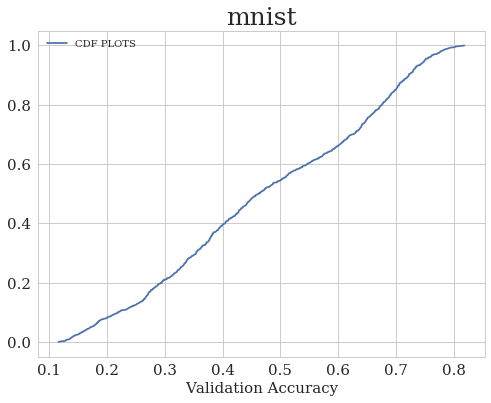

In [35]:
sorted_accuracy = np.sort(validation_accuracy)
yvals = np.arange(len(sorted_accuracy)) / float(len(sorted_accuracy))
plt.plot(sorted_accuracy, yvals, label= "CDF PLOTS")
plt.legend(loc=2, fontsize=10)
plt.xlabel("Validation Accuracy", fontsize=15)
plt.title(dataset, fontsize=25)


Plots with parameters, for example with padding and validation accuracy

999 999


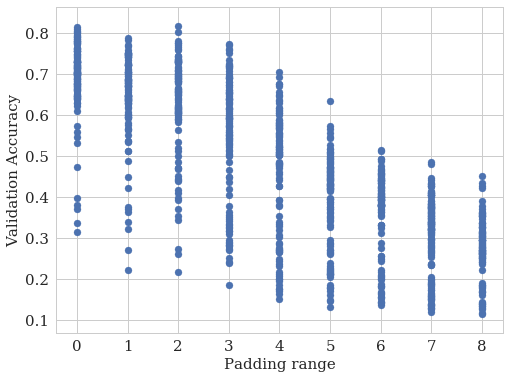

In [44]:
plt.scatter(x=pad, y=validation_accuracy)
ax = sns.boxplot(x="day", y="total_bill", data=tips)

plt.xlabel("Padding range", size=15)
plt.ylabel("Validation Accuracy", size=15)


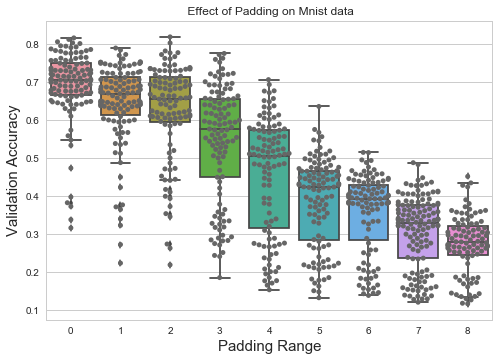

In [34]:
validation_accuracy = results[dataset]["validation_accuracy"]
padding = results[dataset]["pad"]

ax = sns.boxplot(x=padding, y=validation_accuracy)
ax = sns.swarmplot(x=padding, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Padding on Mnist data')
ax.set_xlabel('Padding Range', size=15)
ax.set_ylabel('Validation Accuracy', size=15)

Effect of Rescale on Mnist data

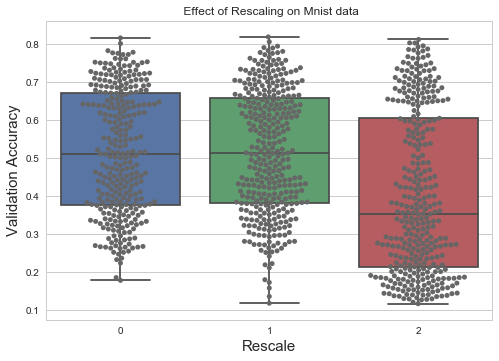

In [35]:

validation_accuracy = results[dataset]["validation_accuracy"]
rescale= results[dataset]["rescale"]
ax = sns.boxplot(x=rescale, y=validation_accuracy)
ax = sns.swarmplot(x=rescale, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Rescaling on Mnist data')
plt.xlabel("Rescale", size=15)
plt.ylabel("Validation Accuracy", size=15)

Effect of Rotation Range on Mnist Data

In [ ]:
validation_accuracy = results[dataset]["validation_accuracy"]
hor_flip= results[dataset]["configs"]["horizontal_flip"]
ax = sns.boxplot(x=hir_flip, y=validation_accuracy)
ax = sns.swarmplot(x=rescale, y=validation_accuracy, color=".40")
ax.set_title(' Effect of Rescaling on Mnist data')
plt.xlabel("Rescale", size=15)
plt.ylabel("Validation Accuracy", size=15)

Make FANOVA Plots

In [60]:
X = []

order = ['rescale', 'vertical_flip', 'horizontal_flip', 'rotation_range', 'pad']

#print(results[dataset]["configs"])
for c in results[dataset]["configs"]:
    vec = []
    for j, k in enumerate(order):
        print(c)
        if c[k] is not None:
            vec.append(c[k])
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results[dataset]["validation_error"]
#print(X, y)

{'vertical_flip': True, 'rescale': 1, 'rotation_range': 119, 'horizontal_flip': True, 'pad': 5}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 119, 'horizontal_flip': True, 'pad': 5}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 119, 'horizontal_flip': True, 'pad': 5}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 119, 'horizontal_flip': True, 'pad': 5}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 119, 'horizontal_flip': True, 'pad': 5}
{'pad': 2, 'rescale': 2, 'rotation_range': 81, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 2, 'rescale': 2, 'rotation_range': 81, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 2, 'rescale': 2, 'rotation_range': 81, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 2, 'rescale': 2, 'rotation_range': 81, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 2, 'rescale': 2, 'rotation_range': 81, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 5, 'rescale': 2, 'rotation_

{'vertical_flip': True, 'rescale': 1, 'rotation_range': 2, 'horizontal_flip': True, 'pad': 3}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 2, 'horizontal_flip': True, 'pad': 3}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 2, 'horizontal_flip': True, 'pad': 3}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 2, 'horizontal_flip': True, 'pad': 3}
{'vertical_flip': True, 'rescale': 1, 'rotation_range': 2, 'horizontal_flip': True, 'pad': 3}
{'pad': 3, 'rescale': 2, 'rotation_range': 162, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 3, 'rescale': 2, 'rotation_range': 162, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 3, 'rescale': 2, 'rotation_range': 162, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 3, 'rescale': 2, 'rotation_range': 162, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 3, 'rescale': 2, 'rotation_range': 162, 'horizontal_flip': False, 'vertical_flip': False}
{'pad': 1, 'rescale': 1, 'rotation_range

KeyError: 'validation_error'